# Titanic
In this task it is proposed to solve the problem of predicting the surviving passengers of the Titanic.
Information about the dataset is available at the <a href=https://www.kaggle.com/c/titanic> link </a>.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The first file contains information about passengers, the second contains information about whether the passenger survived or not.


In [16]:
data = pd.read_csv('titanic_data.csv', index_col='PassengerId')
print(f'Total {len(data)} passengers in the sample')
data

Total 891 passengers in the sample


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [17]:
y = pd.read_csv('titanic_surv.csv')
y.index = data.index
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [18]:
data = data.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [19]:
# survivor analytics by gender
count_male = data['Sex'].value_counts()['male']
count_female = data['Sex'].value_counts()['female']

count_male_surv = data[data['Survived'] == 1]['Sex'].value_counts()['male']
count_female_surv = data[data['Survived'] == 1]['Sex'].value_counts()['female']
print('Surviving men', count_male_surv, 'out of', count_male, '  ', 'proportion:', count_male_surv / count_male)
print('Surviving women', count_female_surv, 'out of', count_female, '  ', 'proportion:', count_female_surv / count_female)

Surviving men 109 out of 577    proportion: 0.18890814558058924
Surviving women 233 out of 314    proportion: 0.7420382165605095


In [22]:
# survivors analytics by class
count_class_one = data['Pclass'].value_counts()[1]
count_class_two = data['Pclass'].value_counts()[2]
count_class_three = data['Pclass'].value_counts()[3]

count_class_one_surv = data[data['Survived'] == 1]['Pclass'].value_counts()[1]
count_class_two_surv = data[data['Survived'] == 1]['Pclass'].value_counts()[2]
count_class_three_surv = data[data['Survived'] == 1]['Pclass'].value_counts()[3]

print('First class survivors', count_class_one_surv, 'out of', count_class_one, '  ', 'proportion', count_class_one_surv / count_class_one)
print('Second class survivors', count_class_two_surv, 'out of', count_class_two,  '  ', 'proportion', count_class_two_surv / count_class_two)
print('Third class survivors', count_class_three_surv, 'out of', count_class_three,  '  ', 'proportion', count_class_three_surv / count_class_three)

First class survivors 136 out of 216    proportion 0.6296296296296297
Second class survivors 87 out of 184    proportion 0.47282608695652173
Third class survivors 119 out of 491    proportion 0.24236252545824846


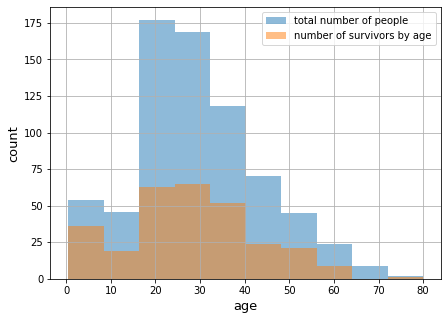

In [23]:
# analytics by age
fig, ax = plt.subplots(1, 1, figsize = (7, 5))

data['Age'].hist(alpha=0.5, label='total number of people')
data[data['Survived'] == 1]['Age'].hist(alpha=0.5, label='number of survivors by age')

plt.xlabel('age', fontsize=13)
plt.ylabel('count', fontsize=13)

plt.legend()
plt.show()